# TIE 2030 Programming Methodology with Programming

## Take Home Assignment

Problem Statement: In this assignment, you will be searching for a given
list of motifs (small size fixed patterns) in a given list of DNA sequences. A 
DNA sequence is made up of fundamental Amino Acids – A (adenine), G
(guanine), C (cytosine), T (thymine). Motif finding is an important problem
in the Bioinformatics domain. Motif finding helps to understand several
common features between species, allows us to understand human diseases, 
and helps drug manufacturers to target towards manufacturing certain drugs.


In [1]:
# import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
def Nucleo_Counter(DNA_Sequence):
    a = 0
    c = 0
    g = 0
    t = 0

    for i in range(0,len(DNA_Sequence)):

        if (DNA_Sequence[i] == "A"):
            a += 1
        elif (DNA_Sequence[i] == "C"):
            c += 1
        elif (DNA_Sequence[i] == "G"):
            g += 1
        elif (DNA_Sequence[i] == "T"):
            t += 1 

    string_A = ("Number of occurences of nucleo A: " + str(a))

    string_C = ("Number of occurences of nucleo C: " + str(c))

    string_G = ("Number of occurences of nucleo G: " + str(g))

    string_T = ("Number of occurences of nucleo T: " + str(t))
    
    return (string_A,string_C,string_T,string_G)

def Motif_Counter(DNA_Sequence, Motif_Count_Dictionary):
    count = 0
    list_res = []
    string_len = len(DNA_Sequence)
    list_dict = list(Motif_Count_Dictionary.keys())

    for h in range(len(list_dict)):
        substr_len = len(list_dict[h])

        for i in range(string_len - substr_len + 1):
            j = 0
            while (j < substr_len):
                if (DNA_Sequence[i+j] != list_dict[h][j]):
                    break
                j += 1

            if (j==substr_len):
                count += 1
                j = 0

        Motif_Count_Dictionary[list_dict[h]] += count

        string = ("Number of occurences of motif "+ str(list_dict[h]) + ":" + str(count))
        list_res.append(string)
        count = 0
        
    return list_res

def Freq_Counter(Motif_Count_Dictionary):
    keys = list(Motif_Count_Dictionary.keys())
    value = list(Motif_Count_Dictionary.values())
    low_value = min(value)
    high_value = max(value)
    low_seq = ''
    high_seq = ''

    for i in range(len(keys)):
        if (Motif_Count_Dictionary[keys[i]] == low_value):
            low_seq += keys[i]
            low_seq += ' '
        if (Motif_Count_Dictionary[keys[i]] == high_value):
            high_seq += keys[i]
            high_seq+= ' '

    string_low = ("Motifs that occur least frequently (" + str(low_value) + " times): " + low_seq)

    string_high = ("Motifs that occur most frequently ("+ str(high_value) + " times): " + high_seq)
    
    return string_low, string_high

def Target_Search(DNA_Sequence):
    shortest_len = 0
    count = 0
    
    if (len(DNA_Sequence) <= len(Target_Seq)):
        shortest_len = len(DNA_Sequence)
    elif(len(DNA_Sequence) > len(Target_Seq)):
        shortest_len = len(Target_Seq)
        
    for i in range(shortest_len):
        if (DNA_Sequence[i] == Target_Seq[i]):
            count += 1
    return count
    

def Plot_Chart(Motif_Count_Dictionary):
    return

Target_Seq = "ATGGGGAATGCGCAATGCAACGTAATTTAGAGGAGCCCCAGTTTGAAAGT"

def main():
    with open('C:/Users/ongkw/Desktop/DNA_analysis_results.txt', 'w') as f:
        f.write("Full Name: Daniel Woo") # Insert Own Name
        f.write('\n')
        
        f.write("Matric Number: ") # Insert Matric Number
        f.write('\n')
        
        start_time = time.time() 
    
        motifs = open("C:/Users/ongkw/Desktop/assignment3/motifs.txt").read().split()
        sequences = open("C:/Users/ongkw/Desktop/assignment3/sequences.txt").read().split()
    
        target_list = []
        motif_list = []
        Motif_Count_Dictionary = {}
        
        #Set the Key-Value Pair into dictionary
        for i in range(0,len(motifs)):
            Motif_Count_Dictionary.update({motifs[i]:0})
        
        #Set Print Sequence
        for i in range(0,len(sequences)):
            string = ("Sequence "+ str(i)+ ": "+ str(sequences[i]))
            f.write(string)
            f.write('\n')
            
            string = ("Length of Sequence:" + str(len(sequences[i])))
            f.write(string)
            f.write('\n')
            
            #Use of function Nucleo Counter
            a,c,t,g = Nucleo_Counter(sequences[i])
            f.write(a)
            f.write('\n')
            f.write(c)
            f.write('\n')
            f.write(t)
            f.write('\n')
            f.write(g)
            f.write('\n')
            
            #Use of function Motif Counter
            motif_list = Motif_Counter(sequences[i], Motif_Count_Dictionary)
            for item in range(len(motif_list)):
                f.write(motif_list[item])
                f.write('\n')
                
            target_list.append(Target_Search(sequences[i]))
            f.write('\n')
            
        #Use of function Freq Counter
        low,high = Freq_Counter(Motif_Count_Dictionary)
        f.write(low)
        f.write('\n')
        f.write(high)
        f.write('\n')
        f.write('\n')
    
        #Use of function Similar Sequences
        string = ("Sequences that are at least similar to the target sequences (similarity=" + str(min(target_list)) + "):")
        f.write(string)
        f.write('\n')
        
        for i in range(0,len(target_list)):
            if (target_list[i] == min(target_list)):
                string = (sequences[i])
                f.write(string)
                f.write('\n')
        
        f.write('\n')
        string = ("Sequences that are at most similar to the target sequences (similarity=" + str(max(target_list)) + "):") 
        f.write(string)
        f.write('\n')
    
        for i in range(0,len(target_list)):
            if (target_list[i] == max(target_list)):
                string = (sequences[i])
                f.write(string)
                f.write('\n')
    
        end_time = time.time()
        time_diff = (end_time-start_time)%60
        time_format = "{:.2f}".format(time_diff)
        
        #Processing Time Function
        string_three = ("Processing Time: " + time_format + " seconds")
        f.write('\n')
        f.write(string_three)
    
    
    #Plotting graph
    plt.figure(figsize=(10,4))
    plt.bar(list(Motif_Count_Dictionary.keys()), Motif_Count_Dictionary.values(), edgecolor = 'k', color = 'b', alpha = 0.5)
    plt.title('Number of Occurrences of Motifs in the Given DNA Sequences')
    plt.xlabel('Motif')
    plt.ylabel('Number of Occurrences')
    plt.show()

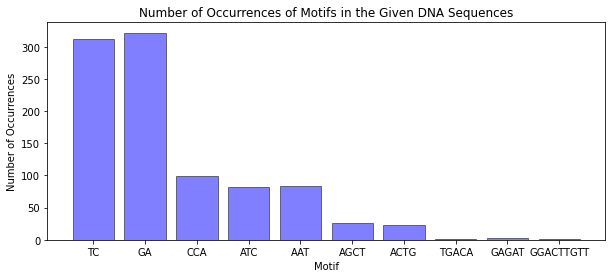

In [3]:
main()